# 1) Prepare a classification model using SVM for salary data 

In [2]:
# Importing all the necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the comma separated values file into the dataframe

In [3]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\SVM\SalaryData_Test(1).csv')
data.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [4]:
data.shape

(15060, 14)

There are 14 features and 15060 instances.

In [5]:
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

There are no null values

In [7]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Data Visualisation

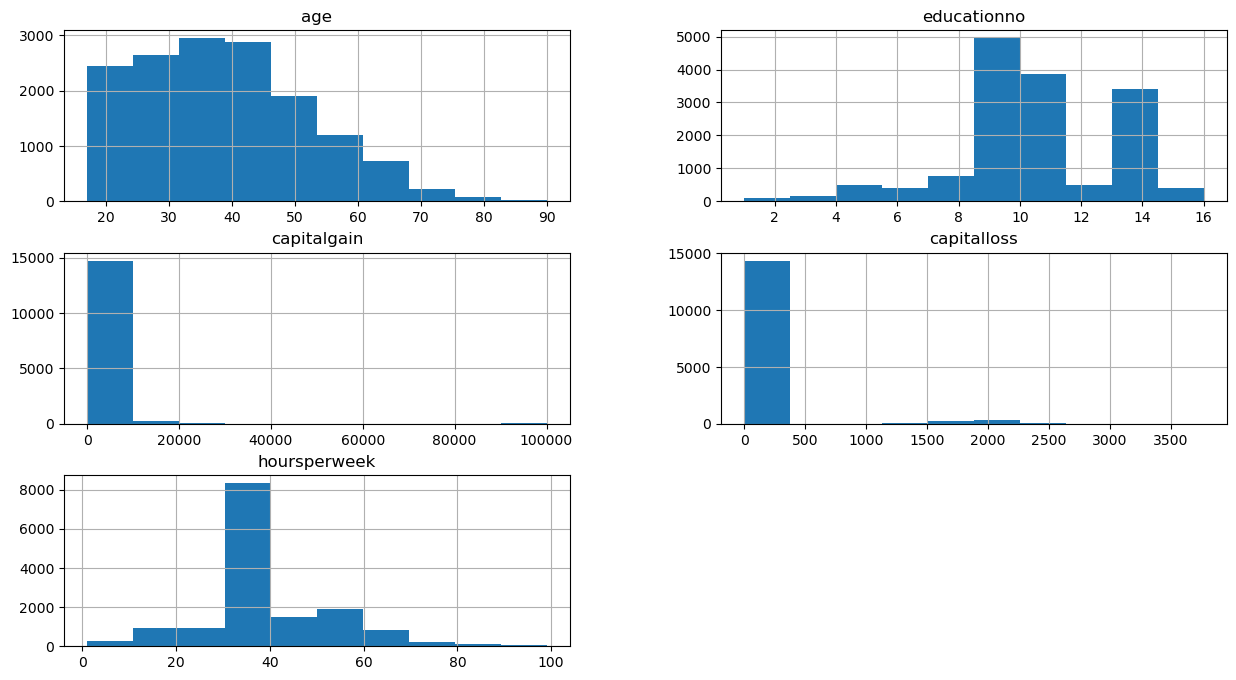

In [10]:
data.hist(figsize=(15,8))
plt.show()

# Data Pre Processing

In [3]:
# converting columns to categorical type 
data['workclass'] = data['workclass'].astype('category')
data['education'] = data['education'].astype('category')
data['maritalstatus'] = data['maritalstatus'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['relationship'] = data['relationship'].astype('category')
data['race'] = data['race'].astype('category')
data['sex'] = data['sex'].astype('category')
data['native'] = data['native'].astype('category')

In [11]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
data.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [12]:
# converting categorical variable to numerical variable
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['maritalstatus'] = label_encoder.fit_transform(data['maritalstatus'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['race'] = label_encoder.fit_transform(data['race'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['native'] = label_encoder.fit_transform(data['native'])
data['Salary'] = label_encoder.fit_transform(data['Salary'])

In [13]:
data.head(4)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1


# Separating features and labels

In [14]:
# Splitting the data into x and y as input and output

X = data.iloc[:,0:13]
y = data.iloc[:,13]

In [15]:
X.shape, y.shape

((15060, 13), (15060,))

In [16]:
data.Salary.unique()

array([0, 1])

In [17]:
data.Salary.value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

# Data Standardisation

In [18]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X

array([[-1.02900513, -0.222347  , -2.42343884, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.05742253, -0.222347  ,  0.19017232, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [-0.80479376, -1.25712632, -0.85527215, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       ...,
       [-0.05742253, -0.222347  , -0.33254991, ..., -0.2191694 ,
         0.75013125,  0.26058067],
       [ 0.39100021, -0.222347  , -0.33254991, ..., -0.2191694 ,
        -0.07888904,  0.26058067],
       [-0.2816339 ,  0.81243231, -0.33254991, ..., -0.2191694 ,
         1.57915155,  0.26058067]])

# Splitting the data into training and test dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10542, 13), (10542,), (4518, 13), (4518,))

# Running SVM with default Hyperparameter

In [22]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# default hyperparameters
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
confusion_matrix(y_test, y_pred)

# acc = accuracy_score(y_test, y_pred) * 100
# print("Accuracy =", acc)

Accuracy Score:
0.8470562195661797


array([[3191,  194],
       [ 497,  636]], dtype=int64)

In [23]:
# make predictions on a test set
y_pred=svc.predict(X_test)

In [24]:
y_pred    # this variable stores the predicted labels for the test set

array([0, 0, 0, ..., 0, 1, 0])

## 1. Default Linear kernel

In [25]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8032315183709606


## 2. Default RBF kernel

In [26]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8470562195661797


## 3. Default Polynomial kernel

In [27]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8342186808322266


# Performing K-fold cross validation with different kernels

## 1. CV on Linear kernel

In [28]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.81009296 0.81009296 0.80146082 0.81208499 0.79681275 0.79880478
 0.81540505 0.79747676 0.80212483 0.80942895]


In [29]:
print(scores.mean())

0.8053784860557769


## 2. CV on rbf kernel

In [30]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
print(scores)

[0.83200531 0.84594954 0.83930943 0.8439575  0.83532537 0.84528552
 0.84794157 0.84594954 0.83864542 0.85391766]


In [31]:
print(scores.mean())

0.8428286852589641


## 3. CV on Polynomial kernel

In [32]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
print(scores)

[0.82337317 0.83333333 0.83333333 0.84063745 0.82802125 0.84594954
 0.84262948 0.83997344 0.82934927 0.83930943]


In [33]:
print(scores.mean())

0.8355909694555113


With K-fold cross validation, the dataset got split into 10 equal parts(cv = '10'), thus covering all the data into training as well into testing set.

# Confusion Matrix

Classification Report                precision    recall  f1-score   support

           0       0.84      0.95      0.90      3385
           1       0.78      0.48      0.59      1133

    accuracy                           0.83      4518
   macro avg       0.81      0.72      0.74      4518
weighted avg       0.83      0.83      0.82      4518



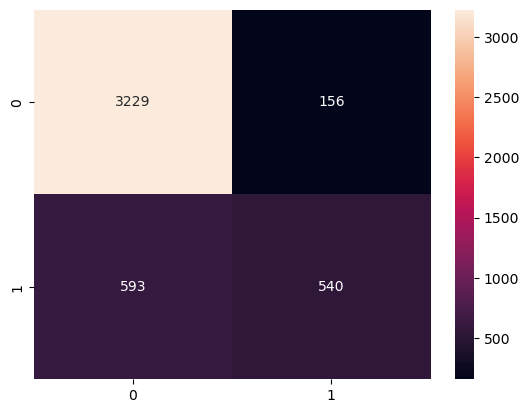

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d")
print('Classification Report ',classification_report(y_test,y_pred))

# Conclusions:
1. Built and Trained SVM Model for Salary Data.
2. Used different Models and tuned using different Hyperparameters to evaluate the performance of the Model.
3. The Accuracy Score evaluated using default hyperparameter & post tuning using Hyperparameter showed equal Accuracy Score in all the three models.
4. The Accuracy Score showed to be 84.00 accross all models and Confusion matrix aas well.
5. This is a promising result, suggesting that the model is performing exceptionally well pre and post tuning with negligible variation in the result.